In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Read in the data
query_data_1 = pd.read_csv("query_results\query 1.csv")
query_data_2 = pd.read_csv("query_results\query 2.csv")
query_data_3 = pd.read_csv("query_results\query 3.csv")
query_data_4 = pd.read_csv("query_results\query 4.csv")
query_data_5 = pd.read_csv("query_results\query 5.csv")
query_data_6 = pd.read_csv("query_results\query 6.csv")
query_data_7 = pd.read_csv("query_results\query 7.csv")
query_data_8 = pd.read_csv("query_results\query 8.csv")
query_data_9 = pd.read_csv("query_results\query 9.csv")
query_data_10 = pd.read_csv("query_results\query 10.csv")
query_data_11 = pd.read_csv("query_results\query 11.csv")
query_data_12 = pd.read_csv("query_results\query 12.csv")

query_data_1.head(),query_data_2.head(),query_data_3.head(),query_data_4.head(),query_data_5.head(),query_data_6.head(),query_data_7.head(),query_data_8.head(),query_data_9.head(),query_data_10.head(),query_data_11.head(),query_data_12.head()

(                             productName productCode  quantityInStock  \
 0  1969 Harley Davidson Ultimate Chopper    S10_1678             7933   
 1                  1996 Moto Guzzi 1100i    S10_2016             6625   
 2   2003 Harley-Davidson Eagle Drag Bike    S10_4698             5582   
 3                       2002 Suzuki XREO    S12_2823             9997   
 4            1980s Black Hawk Helicopter    S18_1662             5330   
 
   warehouseCode  
 0             a  
 1             a  
 2             a  
 3             a  
 4             a  ,
                              productName productCode  quantityInStock  \
 0  1969 Harley Davidson Ultimate Chopper    S10_1678             7933   
 1               1952 Alpine Renault 1300    S10_1949             7305   
 2                  1996 Moto Guzzi 1100i    S10_2016             6625   
 3   2003 Harley-Davidson Eagle Drag Bike    S10_4698             5582   
 4                    1972 Alfa Romeo GTA    S10_4757             325

In [24]:
# Calculate the sales-to-stock ratio for each product in query_data_2
query_data_2['sales_to_stock_ratio'] = query_data_2['totalQuantitySold'] / query_data_2['quantityInStock']
# Sort the products by the sales-to-stock ratio in descending order
top_products_query_2 = query_data_2.sort_values(by='sales_to_stock_ratio', ascending=False).head()
# Sort the products by the sales-to-stock ratio in ascending order to identify potentially overstocked products
overstocked_products_query_2 = query_data_2.sort_values(by='sales_to_stock_ratio', ascending=True).head(5)

In [25]:
# Take a better look at stock ratio by include products that may not have been sold at all
# Calculate the sales-to-stock ratio for each product in query_data_5
query_data_5['sales_to_stock_ratio'] = query_data_5['totalQuantitySold'] / query_data_5['quantityInStock']
# Sort the products by the sales-to-stock ratio in descending order
top_products_query_5 = query_data_5.sort_values(by='sales_to_stock_ratio', ascending=False).head()
# Sort the products by the sales-to-stock ratio in ascending order to identify potentially overstocked products
overstocked_products_query_5 = query_data_5.sort_values(by='sales_to_stock_ratio', ascending=True).head(5)

In [26]:
# Displaying the top 5 products with the highest sales-to-stock ratios
top_products_display = top_products_query_5[['productName', 'sales_to_stock_ratio']].copy()
top_products_display.columns = ['Product Name', 'Sales-to-Stock Ratio']

# Displaying the 5 potentially overstocked products
overstocked_products_display = overstocked_products_query_5[['productName', 'sales_to_stock_ratio']].copy()
overstocked_products_display.columns = ['Product Name', 'Sales-to-Stock Ratio']

top_products_display, overstocked_products_display

(                Product Name  Sales-to-Stock Ratio
 20  1960 BSA Gold Star DBD34             67.666667
 75         1968 Ford Mustang             13.720588
 49  1928 Ford Phaeton Deluxe              7.147059
 21          1997 BMW F650 ST              5.696629
 59                Pont Yacht              2.314010,
               Product Name  Sales-to-Stock Ratio
 109      1985 Toyota Supra              0.000000
 81        1995 Honda Civic              0.093840
 95     2002 Chevy Corvette              0.094643
 89       1982 Ducati 996 R              0.098041
 83   1976 Ford Gran Torino              0.100252)

In [27]:
# Visually compare different in query results
top_products_query_2, overstocked_products_query_2, top_products_query_5, overstocked_products_query_5

(                  productName productCode  quantityInStock  totalQuantitySold  \
 60   1960 BSA Gold Star DBD34    S24_2000               15               1015   
 6           1968 Ford Mustang    S12_1099               68                933   
 89   1928 Ford Phaeton Deluxe    S32_4289              136                972   
 84           1997 BMW F650 ST    S32_1374              178               1014   
 108                Pont Yacht    S72_3212              414                958   
 
      sales_to_stock_ratio  
 60              67.666667  
 6               13.720588  
 89               7.147059  
 84               5.696629  
 108              2.314010  ,
               productName productCode  quantityInStock  totalQuantitySold  \
 24       1995 Honda Civic    S18_1984             9772                917   
 74    2002 Chevy Corvette    S24_3432             9446                894   
 85      1982 Ducati 996 R    S32_2206             9241                906   
 43  1976 Ford Gran

## Results

### 1. Where are items stored and if they were rearranged, could a warehouse be eliminated?

The distribution of products across warehouses is visualized below:

C:\Users\stead\AppData\Local\Temp\ipykernel_33836\501145610.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='warehouseCode', y='total_inventory_volume', data=query_data_4, palette='viridis')


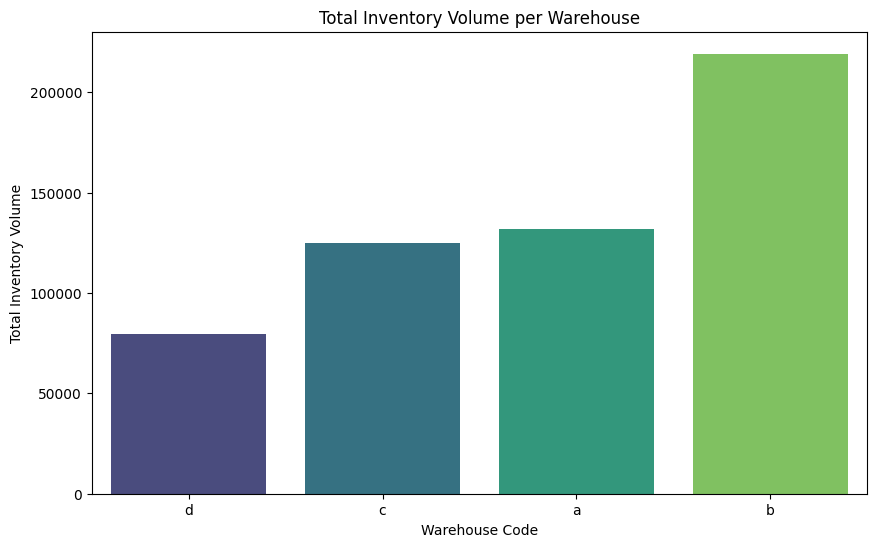

In [28]:
# Plotting the total inventory volume per warehouse
plt.figure(figsize=(10, 6))
sns.barplot(x='warehouseCode', y='total_inventory_volume', data=query_data_4, palette='viridis', hue = 'warehouseCode')
plt.title('Total Inventory Volume per Warehouse')
plt.xlabel('Warehouse Code')
plt.ylabel('Total Inventory Volume')
plt.show()

### 2. How are inventory numbers related to sales figures? Do the inventory counts seem appropriate for each item?

The sales-to-stock ratio provides insights into how inventory numbers relate to sales figures. A high ratio indicates that a product sells out quickly compared to its stock, while a low ratio suggests that the product might be overstocked. The top 5 products with the highest sales-to-stock ratios and the 5 potentially overstocked products (lowest sales-to-stock ratios) are displayed below:

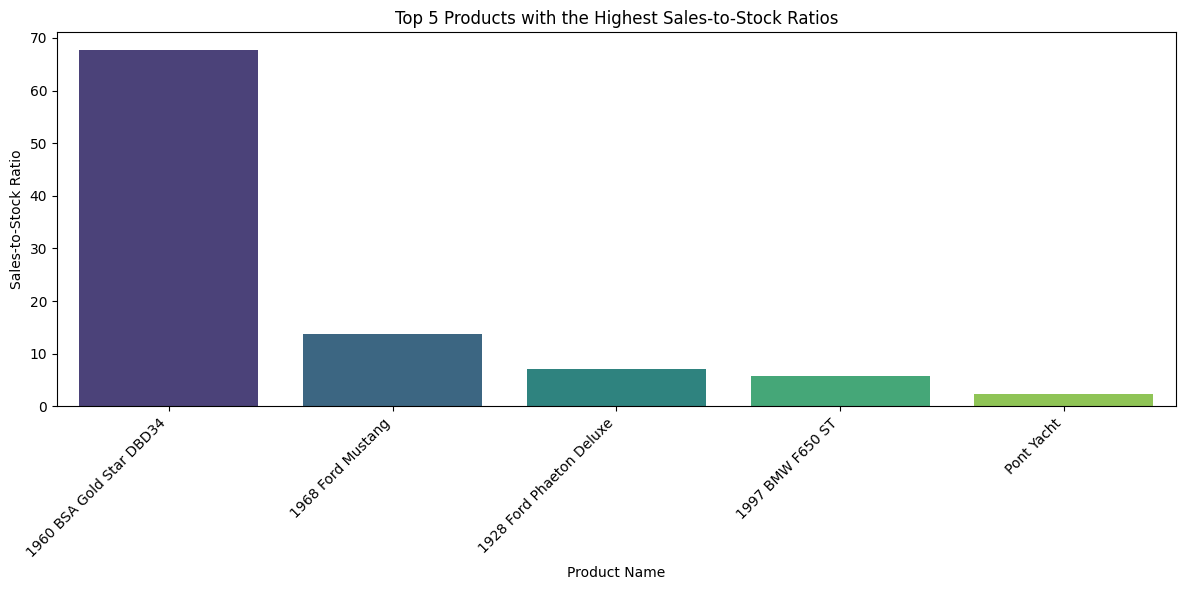

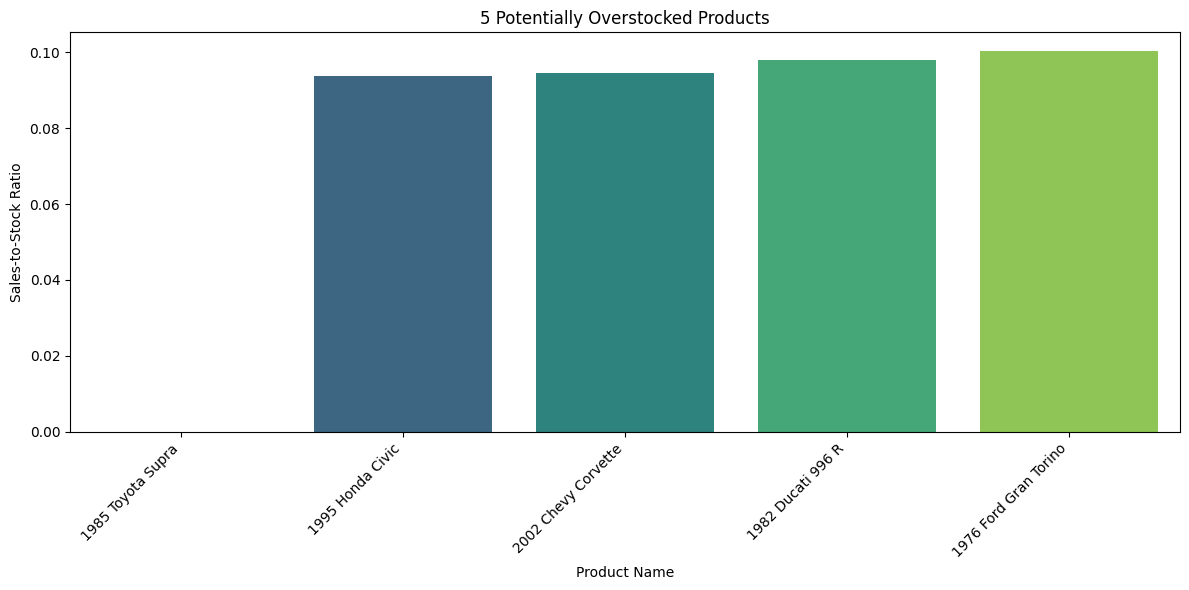

In [32]:
# Plotting the top 5 products with the highest sales-to-stock ratios
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Name', y='Sales-to-Stock Ratio', data=top_products_display, palette='viridis', hue='Product Name')
plt.title('Top 5 Products with the Highest Sales-to-Stock Ratios')
plt.xlabel('Product Name')
plt.ylabel('Sales-to-Stock Ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting the 5 potentially overstocked products
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Name', y='Sales-to-Stock Ratio', data=overstocked_products_display, palette='viridis', hue='Product Name')
plt.title('5 Potentially Overstocked Products')
plt.xlabel('Product Name')
plt.ylabel('Sales-to-Stock Ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 3. Are we storing items that are not moving? Are any items candidates for being dropped from the product line?

The products that have not been sold (i.e., no sales figures) are listed below:

In [30]:
# Filtering products with no sales
unsold_products = query_data_5[query_data_5['totalQuantitySold'] == 0]
unsold_products[['productName', 'productCode', 'quantityInStock']]

,productName,productCode,quantityInStock
109,1985 Toyota Supra,S18_3233,7733


### 4. Can the company ship to customers within 24hrs? If not, what steps could be taken to accomplish this?

The distribution of the time taken to ship orders is visualized below:

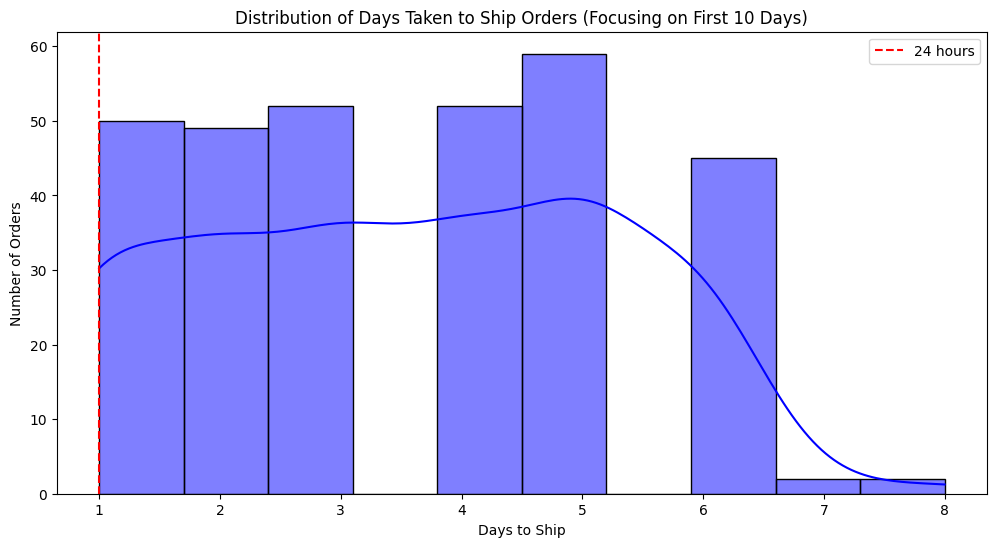

In [31]:
# Plotting the distribution of days taken to ship the orders with a focus on the near time
plt.figure(figsize=(12, 6))
sns.histplot(query_data_8[query_data_8['daysToShip'] <= 10]['daysToShip'], bins=10, kde=True, color='blue')
plt.title('Distribution of Days Taken to Ship Orders (Focusing on First 10 Days)')
plt.xlabel('Days to Ship')
plt.ylabel('Number of Orders')
plt.axvline(x=1, color='red', linestyle='--', label='24 hours')
plt.legend()
plt.show()